論文とほとんど同じモデル

In [1]:
using DataFrames
using PyPlot

In [2]:
function initialize(N, T, C0, average_talent, talent_distribution)
    t = [average_talent for _ = 1:N] + talent_distribution*randn(N)
    for i = 1:N
        if t[i] < 0.0
            t[i] = 0.0
        elseif t[i] > 1.0
            t[i] = 1.0
        end
    end

    init_info_dic = Dict(
        "1:name" => [i for i = 1:N],
        "2:talent" => t,
        "3:meet ruck counter" => [0 for _ = 1:N],
        "4:get ruck counter" => [0 for _ = 1:N],
        "5:unruck counter" => [0 for _ = 1:N],
        "6:capital" => [C0 for _ = 1:N],
        "7:x" => rand(N),
        "8:y" => rand(N),
        "9:r" => [0.0 for _ = 1:N],
    )

    df = DataFrame(init_info_dic)

    hist(df[:,2], bins=Int(floor(sqrt(N))))
    print("histgram of the talent")
    xlabel("talent")
    return df
end

initialize (generic function with 1 method)

In [3]:
function run(df, cross_range, N_E, times)
    ruck_place = rand(N_E,2)
    unruck_place = rand(N_E,2)
    
    I = size(df)[1]
    for t = 1:times
        for p = 1:size(ruck_place)[1]
            x, y = ruck_place[p,:]
            for i = 1:size(df)[1]
                df[i,9] = 0
                df[i,9] += (df[i,7] - x)^2
                df[i,9] += (df[i,8] - y)^2
                df[i,9] = sqrt(df[i,9])
            
                if df[i,9] <= cross_range
                    df[i,3] += 1
                    if rand() <= df[i,2]
                        df[i,4] += 1
                        df[i,6] *= 2
                    end
                end
            end
        end
        for p = 1:size(unruck_place)[1]
            x, y = unruck_place[p,:]
            for i = 1:size(df)[1]
                df[i,9] = 0
                df[i,9] += (df[i,7] - x)^2
                df[i,9] += (df[i,8] - y)^2
                df[i,9] = sqrt(df[i,9])
            
                if df[i,9] <= cross_range
                    df[i,5] += 1
                    df[i,6] /= 2
                end
            end
        end
         
        ruck_place += 0.011*randn(N_E, 2)
        unruck_place += 0.011*randn(N_E, 2)
        for i = 1:size(ruck_place)[1]
            while ruck_place[i] < 0
                ruck_place[i] += 1
            end
            while ruck_place[i] > 1
                ruck_place[i] -= 1
            end
        end
        for i = 1:size(unruck_place)[1]
            while unruck_place[i] < 0
                unruck_place[i] += 1
            end
            while unruck_place[i] > 1
                unruck_place[i] -= 1
            end
        end
    end
end

run (generic function with 1 method)

In [4]:
function histgram_of_the_capital(df, N)
    hist(df[:,6], bins=Int(floor(sqrt(N))))
    print("histgram of the capital")
    yscale("log")
    xlabel("capital")
    savefig("histgram_of_the_capital.png")
end

function scatter_talent_vs_capital(df)
    scatter(df[:,"2:talent"], df[:,"6:capital"])
    yscale("log")
    xlabel("talent")
    ylabel("capital")
    title("scatter talent vs capital")
    print("scatter talent vs capital")
    savefig("scatter_talent_vs_capital.png")
end

function scatter_capital_vs_average_talent_at_the_capital(df)
    sort!(df, [:"6:capital"])
    average_talent_in_the_capital_lst = []
    capital_lst = []
    average_talent, current_capital, counter = 0, 0, 0
    for i = 1:size(df)[1]
        if df[i,6] == current_capital
            average_talent += df[i,2]
            counter += 1
        else
            if i != 1
                average_talent /= counter
                push!(average_talent_in_the_capital_lst, average_talent)
                push!(capital_lst, current_capital)
            end
            average_talent = df[i,2]
            current_capital = df[i,6]
            counter = 1
        end
    end
    average_talent /= counter
    push!(average_talent_in_the_capital_lst, average_talent)
    push!(capital_lst, current_capital)
    
    scatter(capital_lst, average_talent_in_the_capital_lst)
    xscale("log")
    xlabel("capital")
    ylabel("average talent at the capital")
    title("capital vs average talent at the capital")
    print("capital vs average talent at the capital")
    savefig("scatter_capital_vs_average_talent_at_the_capital.png")
end

function capital_vs_average_number_of_rucky_event_1(df)
    sort!(df, [:"6:capital"])
    average_number_of_ruck_event_at_the_capital_lst = []
    capital_lst = []
    average_number_of_ruck_event, current_capital, counter = 0, 0, 0
    for i = 1:size(df)[1]
        if df[i,6] == current_capital
            average_number_of_ruck_event += df[i,3]
            counter += 1
        else
            if i != 1
                average_number_of_ruck_event /= counter
                push!(average_number_of_ruck_event_at_the_capital_lst, average_number_of_ruck_event)
                push!(capital_lst, current_capital)
            end
            average_number_of_ruck_event = df[i,3]
            current_capital = df[i,6]
            counter = 1
        end
    end
    average_number_of_ruck_event /= counter
    push!(average_number_of_ruck_event_at_the_capital_lst, average_number_of_ruck_event)
    push!(capital_lst, current_capital)
    
    scatter(capital_lst, average_number_of_ruck_event_at_the_capital_lst)
    xscale("log")
    xlabel("capital")
    ylabel("average number of encountered rucky event at the capital")
    title("capital vs average number of encountered rucky event at the capital")
    print("capital vs average number of encountered rucky event at the capital")
    savefig("scatter_capital_vs_average_number_of_encountered_rucky_event_at_the_capital.png")
end

function capital_vs_average_number_of_rucky_event_2(df)
    sort!(df, [:"6:capital"])
    average_number_of_ruck_event_at_the_capital_lst = []
    capital_lst = []
    average_number_of_ruck_event, current_capital, counter = 0, 0, 0
    for i = 1:size(df)[1]
        if df[i,6] == current_capital
            average_number_of_ruck_event += df[i,4]
            counter += 1
        else
            if i != 1
                average_number_of_ruck_event /= counter
                push!(average_number_of_ruck_event_at_the_capital_lst, average_number_of_ruck_event)
                push!(capital_lst, current_capital)
            end
            average_number_of_ruck_event = df[i,4]
            current_capital = df[i,6]
            counter = 1
        end
    end
    average_number_of_ruck_event /= counter
    push!(average_number_of_ruck_event_at_the_capital_lst, average_number_of_ruck_event)
    push!(capital_lst, current_capital)
    
    scatter(capital_lst, average_number_of_ruck_event_at_the_capital_lst)
    xscale("log")
    xlabel("capital")
    ylabel("average number of got rucky event at the capital")
    title("capital vs average number of got rucky event at the capital")
    print("capital vs average number of got rucky event at the capital")
    savefig("scatter_capital_vs_average_number_of_got_rucky_event_at_the_capital.png")
end

function capital_vs_average_number_of_unrucky_event(df)
    sort!(df, [:"6:capital"])
    average_number_of_unruck_event_at_the_capital_lst = []
    capital_lst = []
    average_number_of_unruck_event, current_capital, counter = 0, 0, 0
    for i = 1:size(df)[1]
        if df[i,6] == current_capital
            average_number_of_unruck_event += df[i,5]
            counter += 1
        else
            if i != 1
                average_number_of_unruck_event /= counter
                push!(average_number_of_unruck_event_at_the_capital_lst, average_number_of_unruck_event)
                push!(capital_lst, current_capital)
            end
            average_number_of_unruck_event = df[i,5]
            current_capital = df[i,6]
            counter = 1
        end
    end
    average_number_of_unruck_event /= counter
    push!(average_number_of_unruck_event_at_the_capital_lst, average_number_of_unruck_event)
    push!(capital_lst, current_capital)
    
    scatter(capital_lst, average_number_of_unruck_event_at_the_capital_lst)
    xscale("log")
    xlabel("capital")
    ylabel("average number of unruck event at the capital")
    title("capital vs average number of unruck event at the capital")
    print("capital vs average number of unruck event at the capital")
    savefig("scatter_capital_vs_average_number_of_unruck_event_at_the_capital.png")
end

function number_of_rucky_function_1(df)
    b = findmax(df[:,"3:meet ruck counter"])[1] - findmin(df[:,"3:meet ruck counter"])[1]
    b = min(b, 100)
    hist(df[:,"3:meet ruck counter"], bins=b)
    yscale("log")
    xlabel("number of encountered rucky event")
    ylabel("number of agent")
    title("number of encountered rucky event vs number of agent")
    print("number of encountered rucky event vs number of agent")
    savefig("number_of_rucky_function_1.png")
end

function number_of_rucky_function_2(df)
    b = findmax(df[:,"4:get ruck counter"])[1] - findmin(df[:,"4:get ruck counter"])[1]
    b = min(b, 100)
    hist(df[:,"4:get ruck counter"], bins=b)
    yscale("log")
    xlabel("number of got rucky event")
    ylabel("number of agent")
    title("number of got rucky event vs number of agent")
    print("number of got rucky event vs number of agent")
    savefig("number_of_rucky_function_2.png")
end

function number_of_unrucky_function(df)
    b = findmax(df[:,"5:unruck counter"])[1] - findmin(df[:,"5:unruck counter"])[1]
    b = min(b, 100)
    hist(df[:,"5:unruck counter"], bins=b)
    yscale("log")
    xlabel("number of unrucky event")
    ylabel("number of agent")
    title("number of unrucky event vs number of agent")
    print("number of unrucky event vs number of agent")
    savefig("number_of_unrucky_function.png")
end

number_of_unrucky_function (generic function with 1 method)

条件１

histgram of the talent

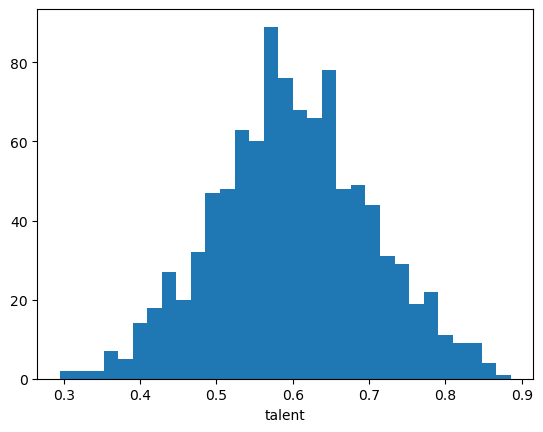

In [5]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.005
average_talent = 0.6
talent_distribution = 0.1

df = initialize(N, T, C0, average_talent, talent_distribution)
run(df, cross_range, N_E, T)

histgram of the capital

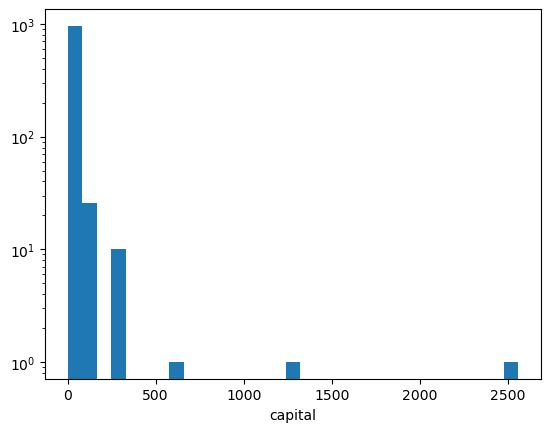

In [6]:
histgram_of_the_capital(df, N)

scatter talent vs capital

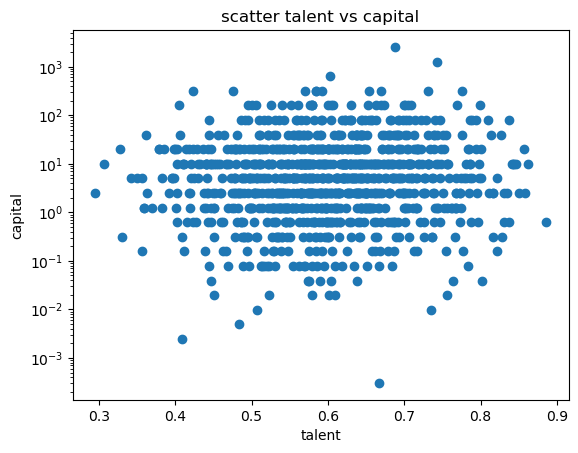

In [7]:
scatter_talent_vs_capital(df)

capital vs average talent at the capital

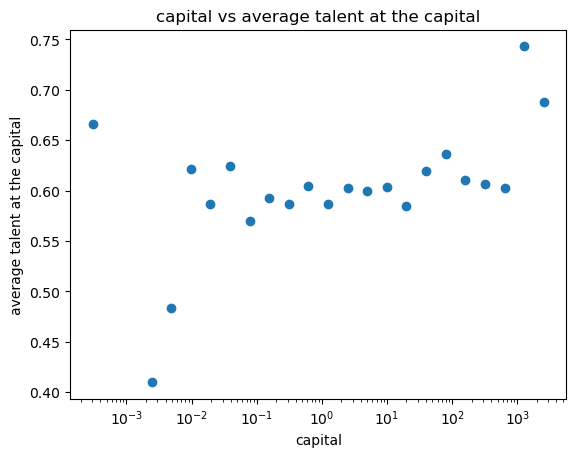

In [8]:
scatter_capital_vs_average_talent_at_the_capital(df)

capital vs average number of encountered rucky event at the capital

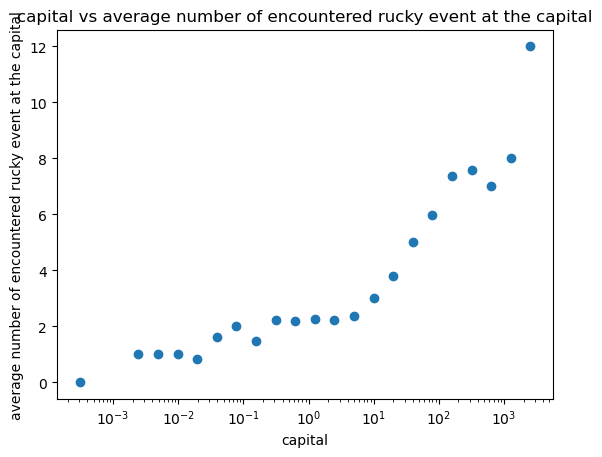

In [9]:
capital_vs_average_number_of_rucky_event_1(df)

In [10]:
#capital_vs_average_number_of_rucky_event_2(df)

capital vs average number of unruck event at the capital

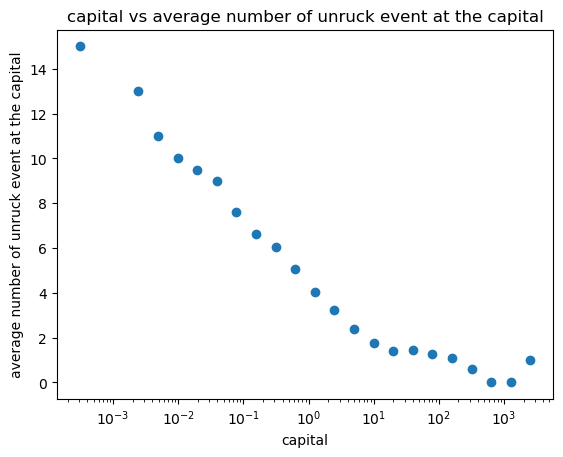

In [11]:
capital_vs_average_number_of_unrucky_event(df)

number of encountered rucky event vs number of agent

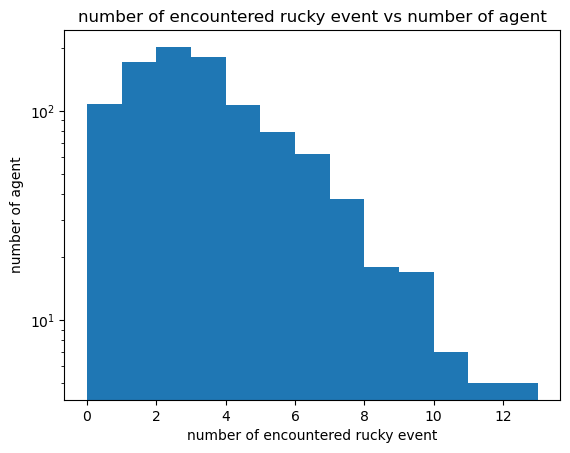

In [12]:
number_of_rucky_function_1(df)

number of got rucky event vs number of agent

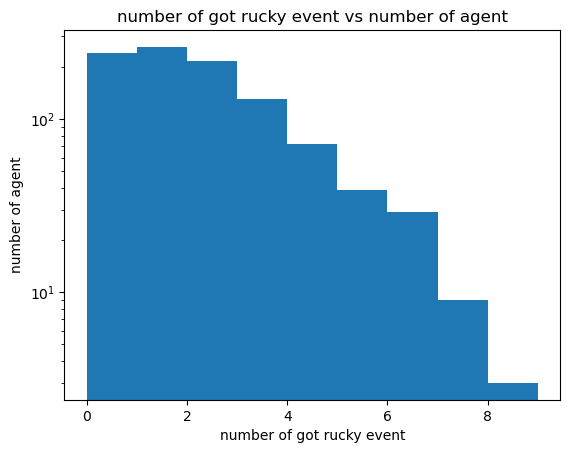

In [13]:
number_of_rucky_function_2(df)

number of unrucky event vs number of agent

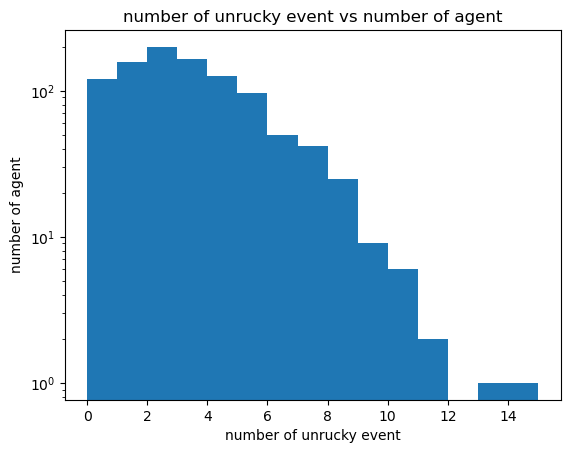

In [14]:
number_of_unrucky_function(df)

条件２

histgram of the talent

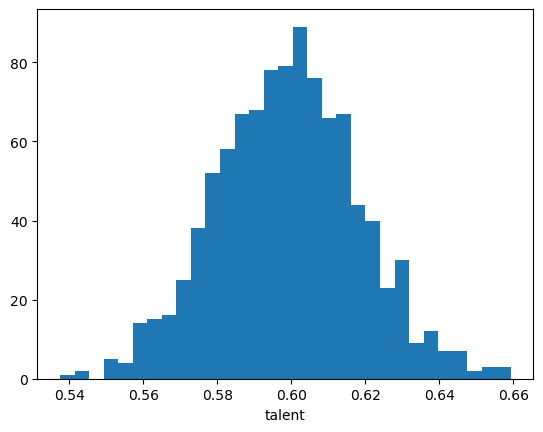

In [15]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.005
average_talent = 0.6
talent_distribution = 0.02

df2 = initialize(N, T, C0, average_talent, talent_distribution)
run(df2, cross_range, N_E, T)

histgram of the capital

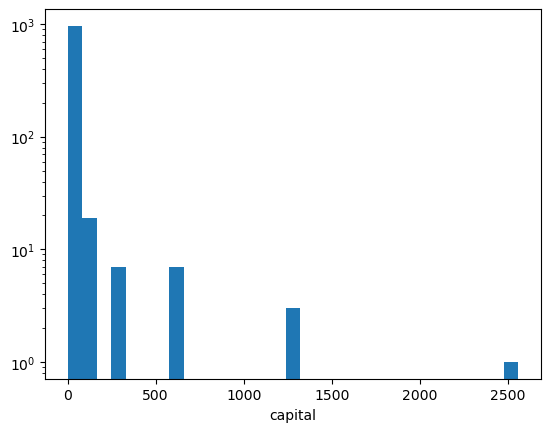

In [16]:
histgram_of_the_capital(df2, N)

scatter talent vs capital

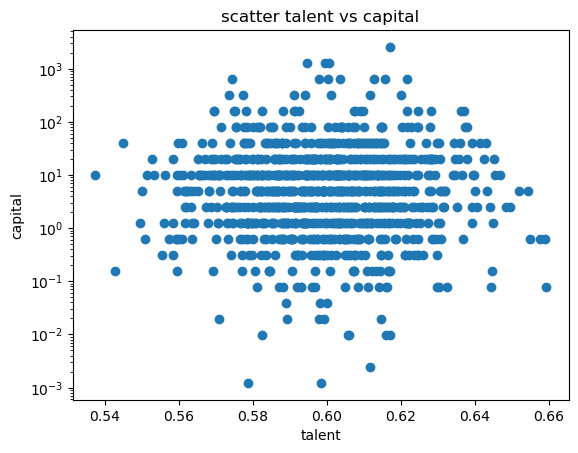

In [17]:
scatter_talent_vs_capital(df2)

capital vs average talent at the capital

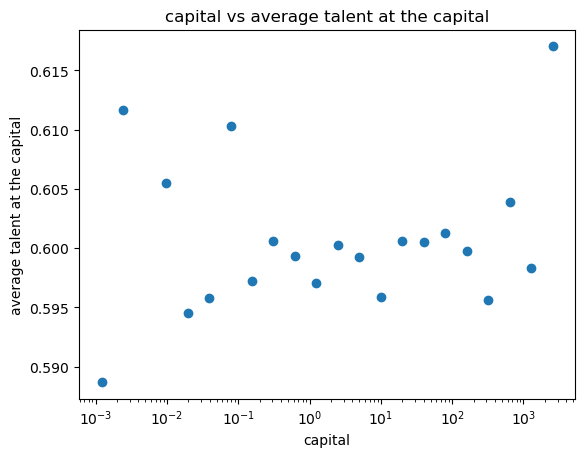

In [18]:
scatter_capital_vs_average_talent_at_the_capital(df2)

capital vs average number of encountered rucky event at the capital

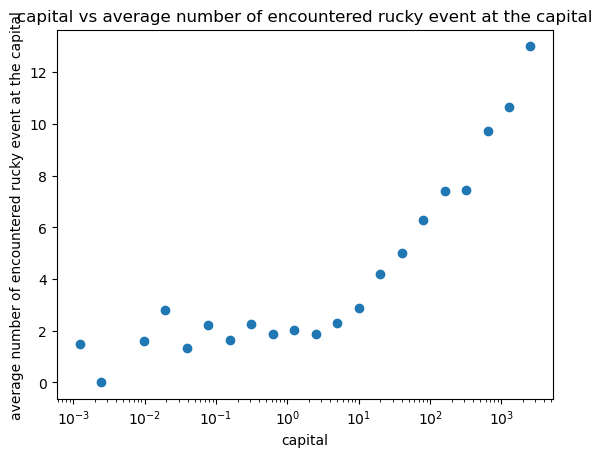

In [19]:
capital_vs_average_number_of_rucky_event_1(df2)

In [20]:
#capital_vs_average_number_of_rucky_event_2(df2)

capital vs average number of unruck event at the capital

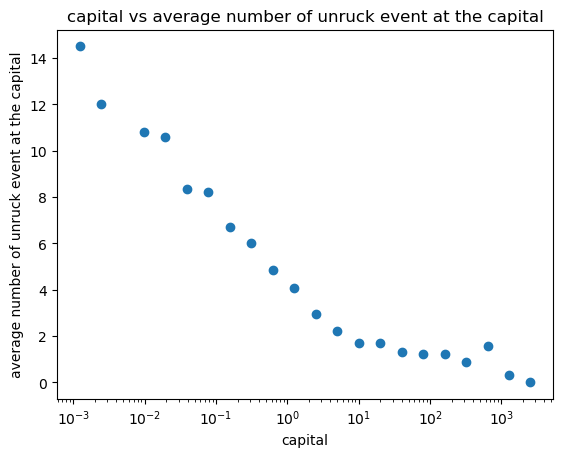

In [21]:
capital_vs_average_number_of_unrucky_event(df2)

number of encountered rucky event vs number of agent

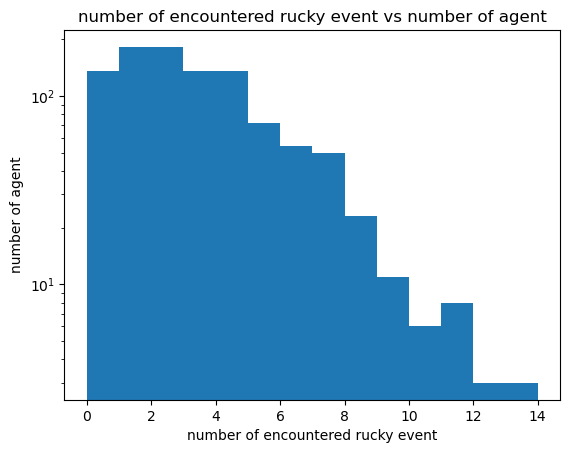

In [22]:
number_of_rucky_function_1(df2)

number of got rucky event vs number of agent

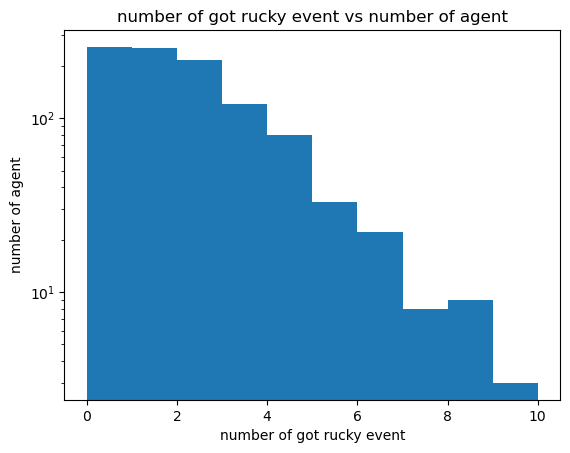

In [23]:
number_of_rucky_function_2(df2)

number of unrucky event vs number of agent

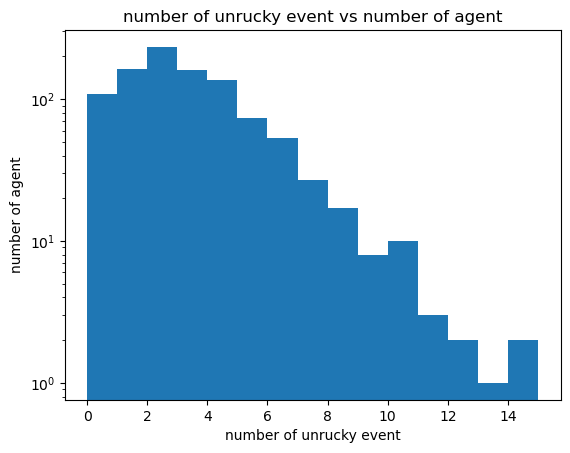

In [24]:
number_of_unrucky_function(df2)

条件３

histgram of the talent

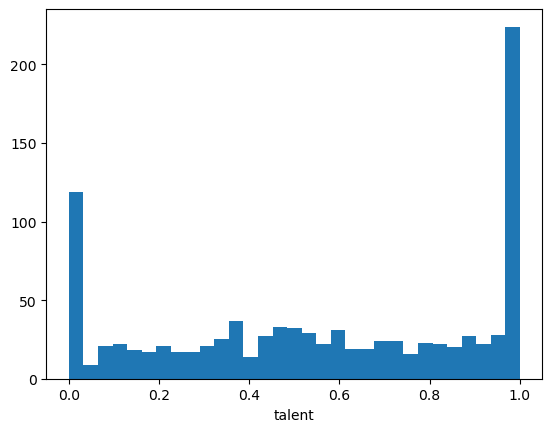

In [25]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.005
average_talent = 0.6
talent_distribution = 0.5

df3 = initialize(N, T, C0, average_talent, talent_distribution)
run(df3, cross_range, N_E, T)

histgram of the capital

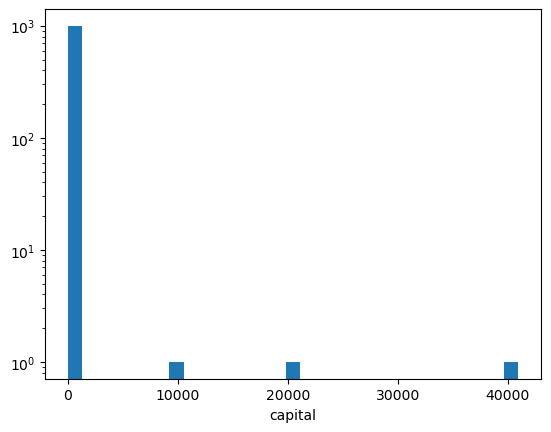

In [26]:
histgram_of_the_capital(df3, N)

scatter talent vs capital

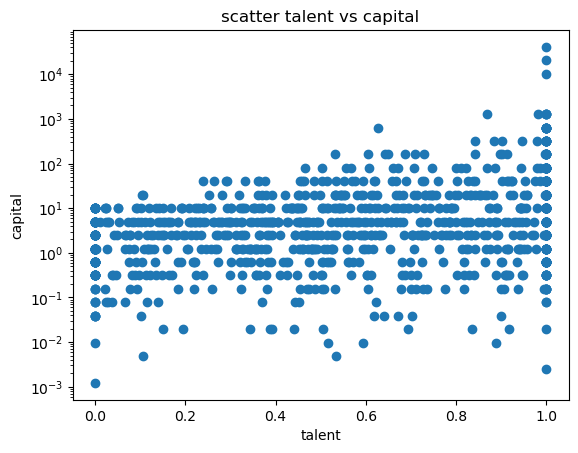

In [27]:
scatter_talent_vs_capital(df3)

capital vs average talent at the capital

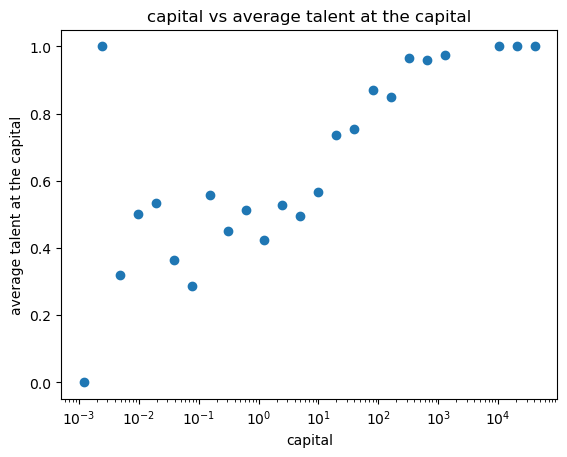

In [28]:
scatter_capital_vs_average_talent_at_the_capital(df3)

capital vs average number of encountered rucky event at the capital

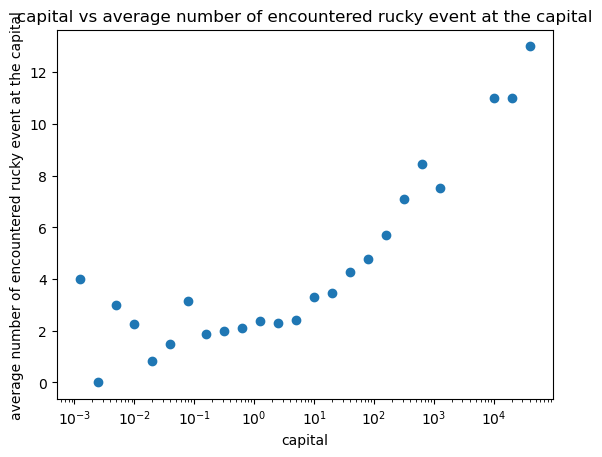

In [29]:
capital_vs_average_number_of_rucky_event_1(df3)

In [30]:
#capital_vs_average_number_of_rucky_event_2(df3)

capital vs average number of unruck event at the capital

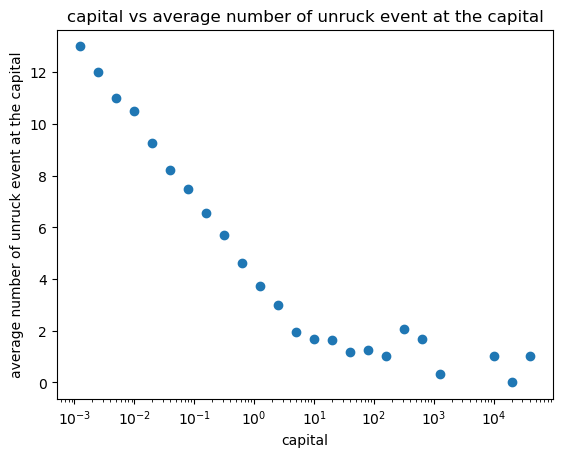

In [31]:
capital_vs_average_number_of_unrucky_event(df3)

number of encountered rucky event vs number of agent

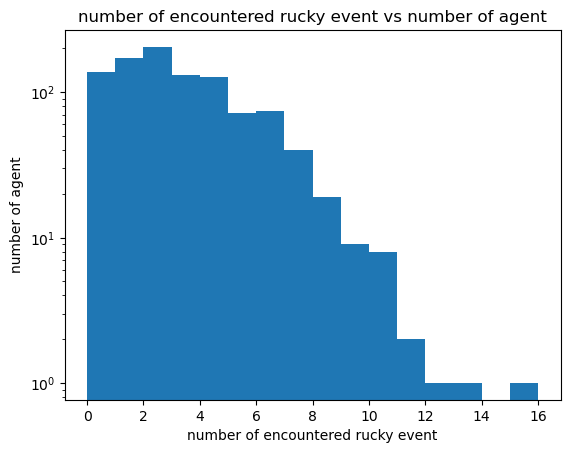

In [32]:
number_of_rucky_function_1(df3)

number of got rucky event vs number of agent

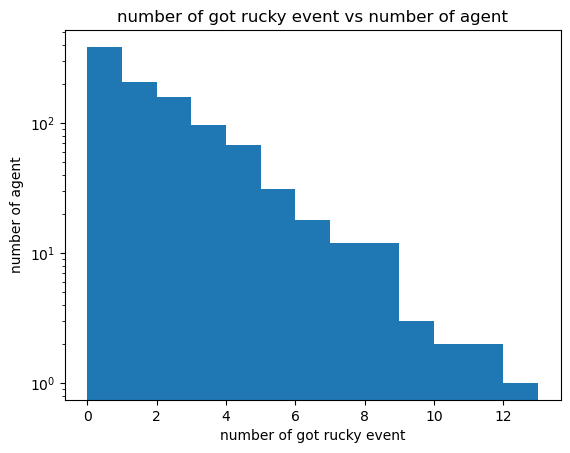

In [33]:
number_of_rucky_function_2(df3)

number of unrucky event vs number of agent

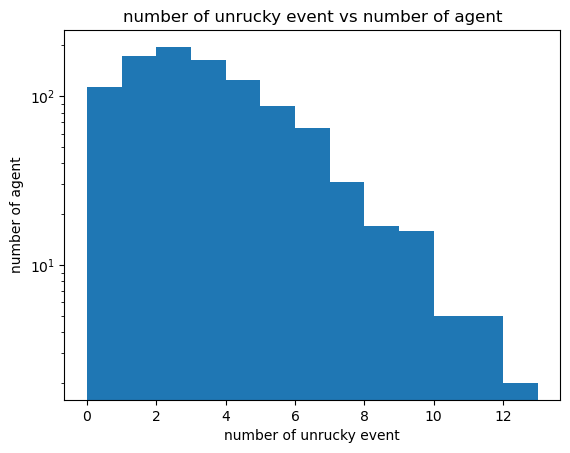

In [34]:
number_of_unrucky_function(df3)

条件４

histgram of the talent

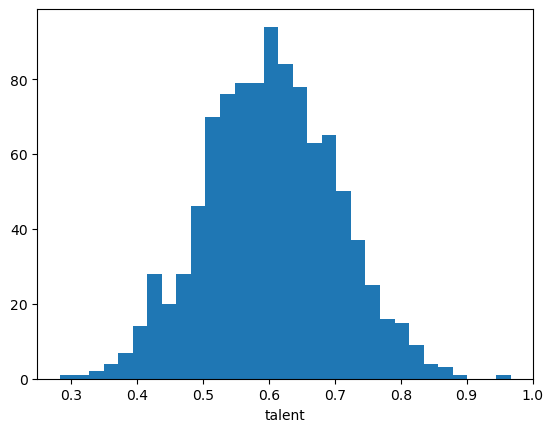

In [35]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.002
average_talent = 0.6
talent_distribution = 0.1

df4 = initialize(N, T, C0, average_talent, talent_distribution)
run(df4, cross_range, N_E, T)

histgram of the capital

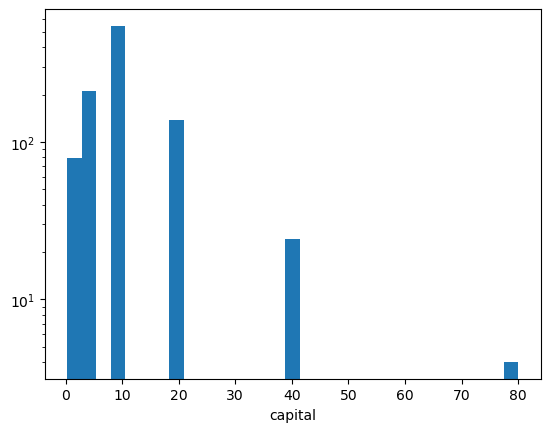

In [36]:
histgram_of_the_capital(df4, N)

scatter talent vs capital

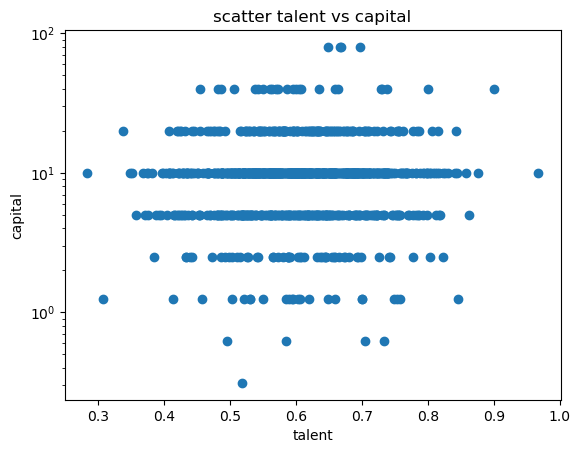

In [37]:
scatter_talent_vs_capital(df4)

capital vs average talent at the capital

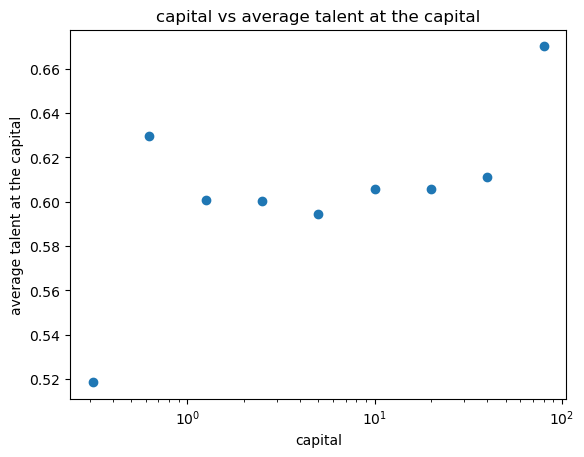

In [38]:
scatter_capital_vs_average_talent_at_the_capital(df4)

capital vs average number of encountered rucky event at the capital

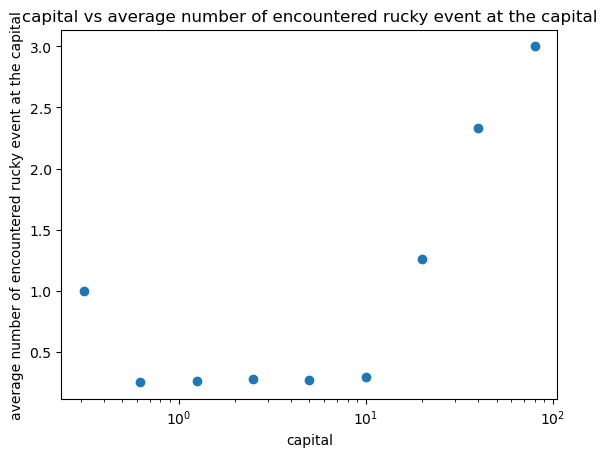

In [39]:
capital_vs_average_number_of_rucky_event_1(df4)

In [40]:
#capital_vs_average_number_of_rucky_event_2(df4)

capital vs average number of unruck event at the capital

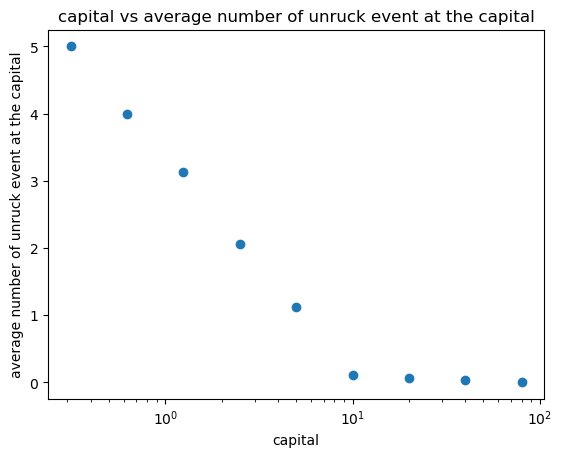

In [41]:
capital_vs_average_number_of_unrucky_event(df4)

number of encountered rucky event vs number of agent

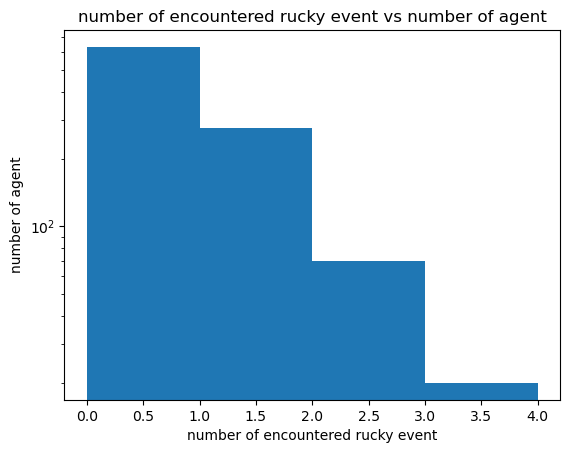

In [42]:
number_of_rucky_function_1(df4)

number of got rucky event vs number of agent

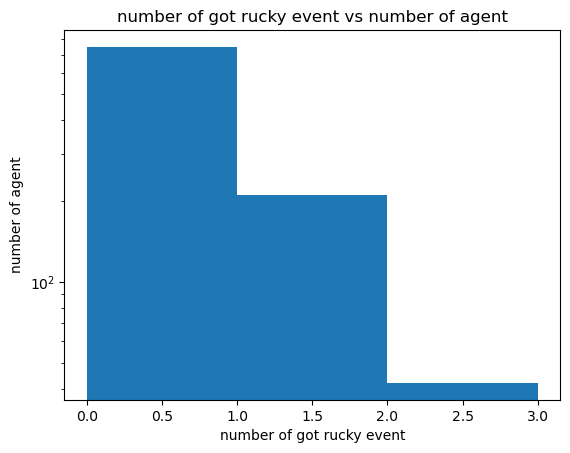

In [43]:
number_of_rucky_function_2(df4)

number of unrucky event vs number of agent

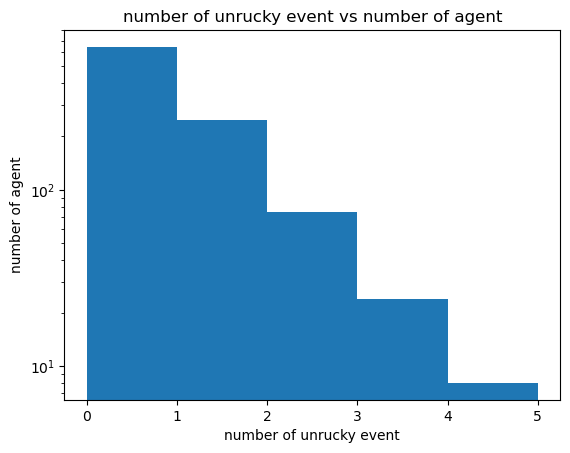

In [44]:
number_of_unrucky_function(df4)

In [45]:
# 条件５

histgram of the talent

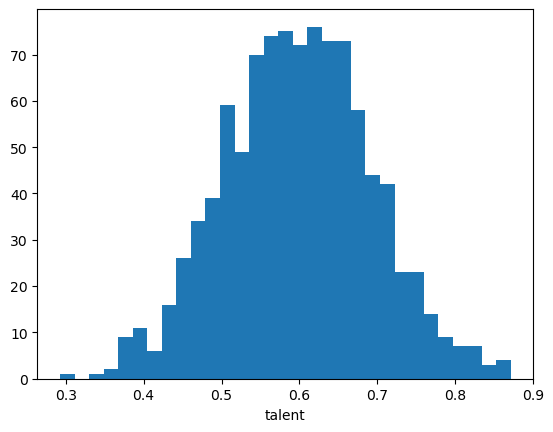

In [56]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.05
average_talent = 0.6
talent_distribution = 0.1

df5 = initialize(N, T, C0, average_talent, talent_distribution)
run(df5, cross_range, N_E, T)

histgram of the capital

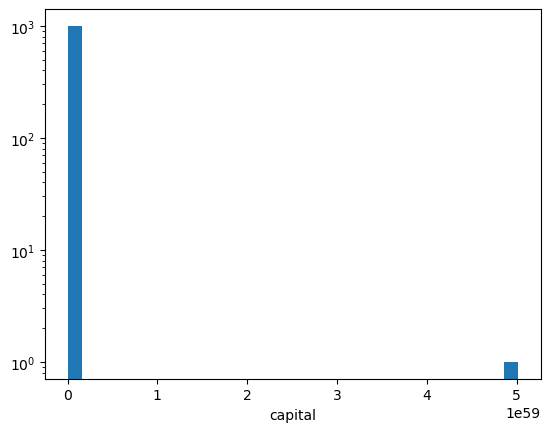

In [57]:
histgram_of_the_capital(df5, N)

scatter talent vs capital

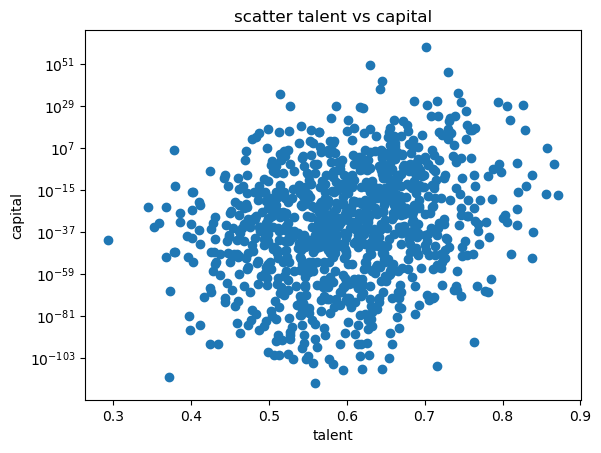

In [58]:
scatter_talent_vs_capital(df5)

capital vs average talent at the capital

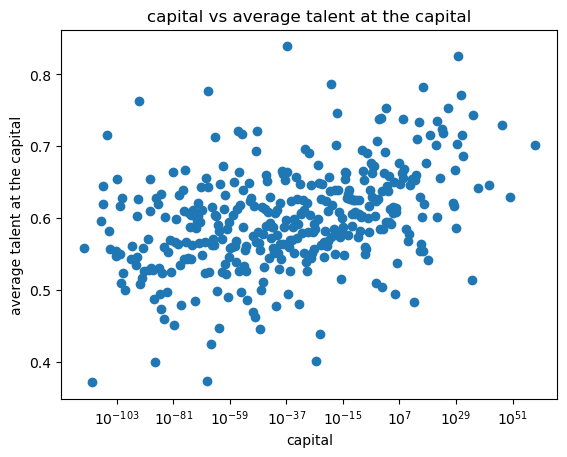

In [59]:
scatter_capital_vs_average_talent_at_the_capital(df5)

capital vs average number of encountered rucky event at the capital

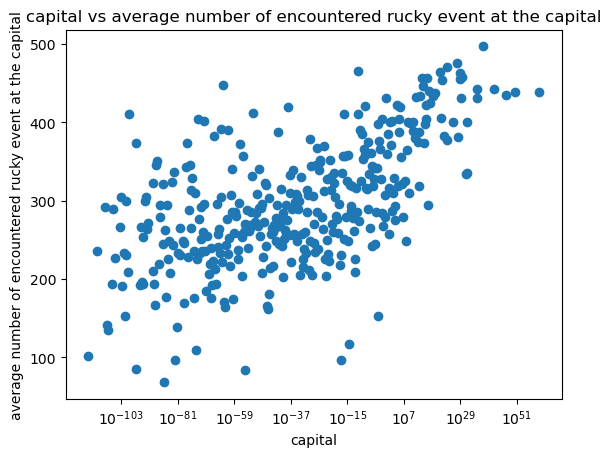

In [60]:
capital_vs_average_number_of_rucky_event_1(df5)

In [61]:
#capital_vs_average_number_of_rucky_event_2(df5)

capital vs average number of unruck event at the capital

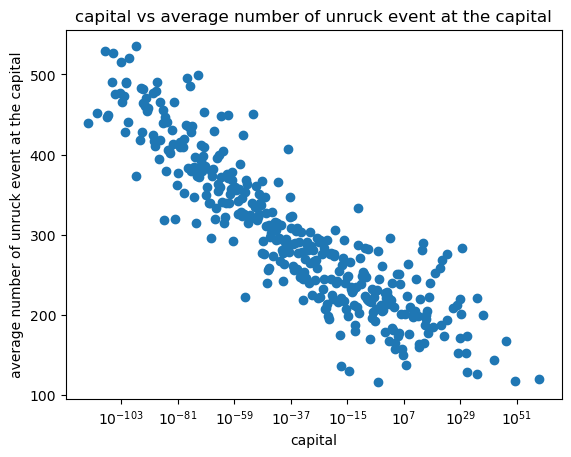

In [62]:
capital_vs_average_number_of_unrucky_event(df5)

number of encountered rucky event vs number of agent

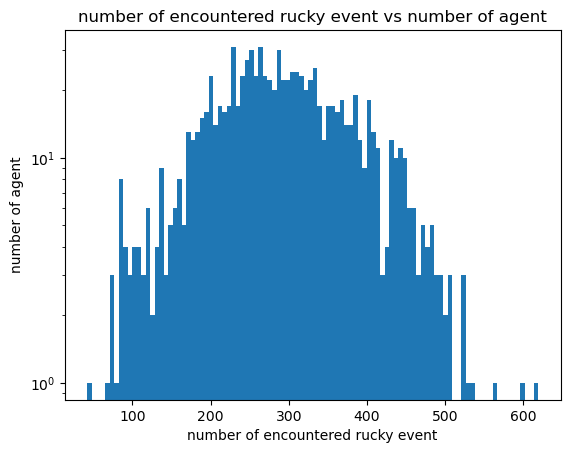

In [63]:
number_of_rucky_function_1(df5)

number of got rucky event vs number of agent

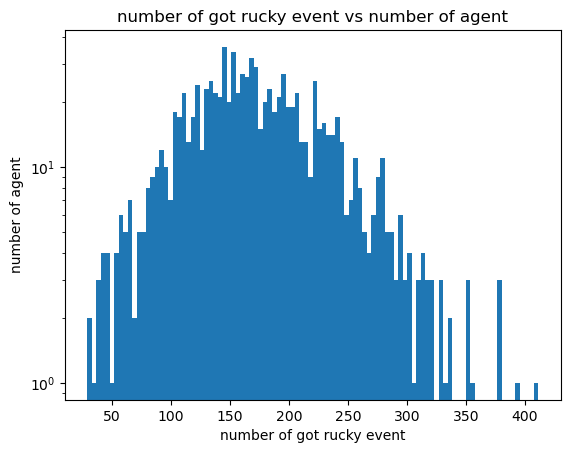

In [64]:
number_of_rucky_function_2(df5)

number of unrucky event vs number of agent

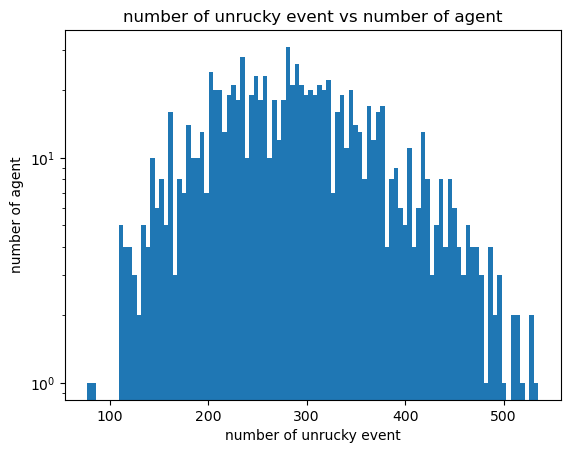

In [65]:
number_of_unrucky_function(df5)